### Hyperparameters and Model Validation

• In the previous section, we saw the basic recipe for applying a supervised machine learning model:

1. Choose a class of model
2. Choose model hyperparameters
3. Fit the model to the training data
4. Use the model to predict labels for new data

• The first two pieces of this—the choice of model and choice of hyperparameters—are perhaps the most important part of using these tools and techniques effectively.

• In order to make an informed choice, we need a way to validate that our model and our hyperparameters are a good fit to the data.

• While this may sound simple, there are some pitfalls that you must avoid to do this effectively.

### Thinking about Model Validation

• In principle, model validation is very simple: after choosing a model and its hyperparameters, we can estimate how effective it is by applying it to some of the training data and comparing the prediction to the known value.

• The following sections first show a naive approach to model validation and why it fails, before exploring the use of holdout sets and cross-validation for more robust model evaluation.

### Model validation the wrong way

• Let's demonstrate the naive approach to validation using the Iris data, which we saw in the previous section.

• We will start by loading the data:

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


• Next we choose a model and hyperparameters.

• Here we'll use a k-neighbors classifier with n_neighbors=1.

• This is a very simple and intuitive model that says "the label of an unknown point is the same as the label of its closest training point:"

In [2]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

• Then we train the model, and use it to predict labels for data we already know:

In [3]:
model.fit(X, y)
y_model = model.predict(X)

• Finally, we compute the fraction of correctly labeled points:

In [4]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

• We see an accuracy score of 1.0, which indicates that 100% of points were correctly labeled by our model! But is this truly measuring the expected accuracy? Have we really come upon a model that we expect to be correct 100% of the time?

• As you may have gathered, the answer is no.

• In fact, this approach contains a fundamental flaw: it trains and evaluates the model on the same data.

• Furthermore, the nearest neighbor model is an instance-based estimator that simply stores the training data, and predicts labels by comparing new data to these stored points: except in contrived cases, it will get 100% accuracy every time!

### Model validation the right way: Holdout sets

• So what can be done? A better sense of a model's performance can be found using what's known as a holdout set: that is, we hold back some subset of the data from the training of the model, and then use this holdout set to check the model performance.

• This splitting can be done using the train_test_split utility in Scikit-Learn:

In [5]:
from sklearn.model_selection import train_test_split

# Split the data with 50% in each
X1, X2, y1, y2 = train_test_split(X, y, random_state = 0, train_size = 0.5)

# fit the model on one set of data
model.fit(X1, y1)

# Evaluate the model on second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

• We see here a more reasonable result: the nearest-neighbor classifier is about 90% accurate on this hold-out set.

• The hold-out set is similar to unknown data, because the model has not "seen" it before.

### Model validation via cross-validation
• One disadvantage of using a holdout set for model validation is that we have lost a portion of our data to the model training.

• In the above case, half the dataset does not contribute to the training of the model! This is not optimal, and can cause problems – especially if the initial set of training data is small.

• One way to address this is to use cross-validation; that is, to do a sequence of fits where each subset of the data is used both as a training set and as a validation set.

• Here we do two validation trials, alternately using each half of the data as a holdout set.

• Using the split data from before, we could implement it like this:

In [6]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

• What comes out are two accuracy scores, which we could combine (by, say, taking the mean) to get a better measure of the global model performance.

• This particular form of cross-validation is a two-fold cross-validation—that is, one in which we have split the data into two sets and used each in turn as a validation set.

• We could expand on this idea to use even more trials, and more folds in the data—for example, here is a visual depiction of five-fold cross-validation:

• Here we split the data into five groups, and use each of them in turn to evaluate the model fit on the other 4/5 of the data.

• This would be rather tedious to do by hand, and so we can use Scikit-Learn's cross_val_score convenience routine to do it succinctly:

In [7]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv = 5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

• Repeating the validation across different subsets of the data gives us an even better idea of the performance of the algorithm.

• Scikit-Learn implements a number of useful cross-validation schemes that are useful in particular situations; these are implemented via iterators in the cross_validation module.

• For example, we might wish to go to the extreme case in which our number of folds is equal to the number of data points: that is, we train on all points but one in each trial.

• This type of cross-validation is known as leave-one-out cross validation, and can be used as follows:

In [8]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

• Because we have 150 samples, the leave one out cross-validation yields scores for 150 trials, and the score indicates either successful (1.0) or unsuccessful (0.0) prediction.

• Taking the mean of these gives an estimate of the error rate:

In [9]:
scores.mean()

0.96

### Selecting the Best Model

• Now that we've seen the basics of validation and cross-validation, we will go into a litte more depth regarding model selection and selection of hyperparameters.

• These issues are some of the most important aspects of the practice of machine learning, and I find that this information is often glossed over in introductory machine learning tutorials.

• Of core importance is the following question: if our estimator is underperforming, how should we move forward? There are several possible answers:

1. Use a more complicated/more flexible model
2. Use a less complicated/less flexible model
3. Gather more training samples
4. Gather more data to add features to each sample

• The answer to this question is often counter-intuitive.

• In particular, sometimes using a more complicated model will give worse results, and adding more training samples may not improve your results! The ability to determine what steps will improve your model is what separates the successful machine learning practitioners from the unsuccessful.

### Validation curves in Scikit-Learn

• Let's look at an example of using cross-validation to compute the validation curve for a class of models.

• Here we will use a polynomial regression model: this is a generalized linear model in which the degree of the polynomial is a tunable parameter.

• For example, a degree-1 polynomial fits a straight line to the data; for model parameters $a$ and $b$:

                            y=ax+b

• A degree-3 polynomial fits a cubic curve to the data; for model parameters $a, b, c, d$:

                            y=ax^3+bx^2+cx+d

• We can generalize this to any number of polynomial features.

• In Scikit-Learn, we can implement this with a simple linear regression combined with the polynomial preprocessor.

• We will use a pipeline to string these operations together.

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

• Now let's create some data to which we will fit our model:

In [11]:
import numpy as np

def make_data(N, err = 1.0, rseed = 1):
    # Randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.rand(N)
    return X, y
X, y = make_data(40)

• We can now visualize our data, along with polynomial fits of several degrees:

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


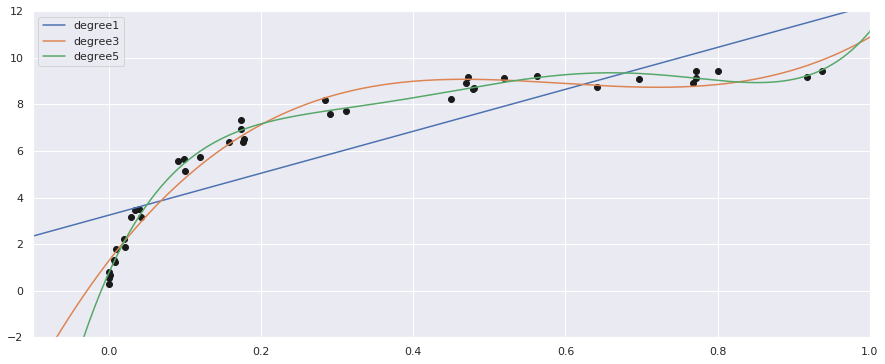

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() # Plot formatting

X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.figure(figsize=(15, 6))
plt.scatter(X.ravel(), y, color = 'k')
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label = 'degree{0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc = 'best');

• The knob controlling model complexity in this case is the degree of the polynomial, which can be any non-negative integer.

• A useful question to answer is this: what degree of polynomial provides a suitable trade-off between bias (under-fitting) and variance (over-fitting)?

• We can make progress in this by visualizing the validation curve for this particular data and model; this can be done straightforwardly using the validation_curve convenience routine provided by Scikit-Learn.

• Given a model, data, parameter name, and a range to explore, this function will automatically compute both the training score and validation score across the range:

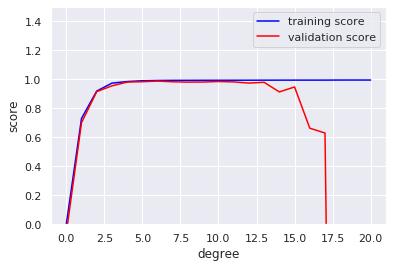

In [13]:
from sklearn.model_selection import validation_curve

degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                         'polynomialfeatures__degree', degree, cv = 7)
plt.plot(degree, np.median(train_score, 1), color = 'blue', label = 'training score')
plt.plot(degree, np.median(val_score, 1), color = 'red', label = 'validation score')
plt.legend(loc = 'best')
plt.ylim(0, 1.5)
plt.xlabel('degree')
plt.ylabel('score');

• This shows precisely the qualitative behavior we expect: the training score is everywhere higher than the validation score; the training score is monotonically improving with increased model complexity; and the validation score reaches a maximum before dropping off as the model becomes over-fit.

• From the validation curve, we can read-off that the optimal trade-off between bias and variance is found for a third-order polynomial; we can compute and display this fit over the original data as follows:

(0, 14)

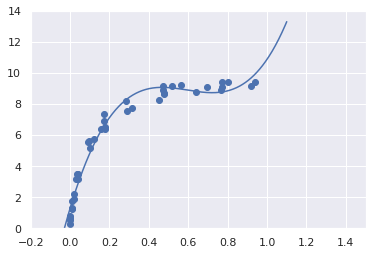

In [14]:
plt.scatter(X.ravel(), y)
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.xlim(-0.2, 1.5)
plt.ylim(0, 14)

• Notice that finding this optimal model did not actually require us to compute the training score, but examining the relationship between the training score and validation score can give us useful insight into the performance of the model.

### Learning Curves

• One important aspect of model complexity is that the optimal model will generally depend on the size of your training data.

• For example, let's generate a new dataset with a factor of five more points:

(-4, 13)

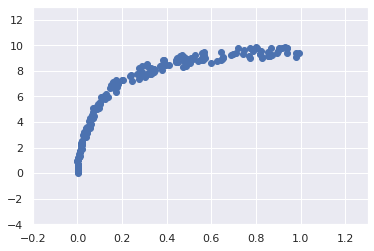

In [15]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2)
plt.xlim(-0.2, 1.3)
plt.ylim(-4, 13)

• We will duplicate the preceding code to plot the validation curve for this larger dataset; for reference let's over-plot the previous results as well:

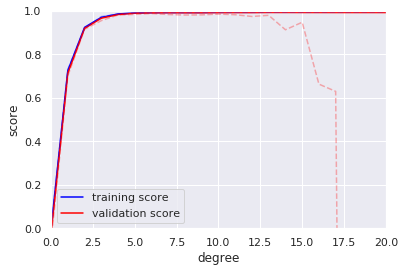

In [16]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                           'polynomialfeatures__degree', degree, cv=7)
plt.plot(degree, np.median(train_score2, 1), color = 'blue', label = 'training score')
plt.plot(degree, np.median(val_score2, 1), color = 'red', label = 'validation score')
plt.plot(degree, np.median(train_score, 1), color = 'blue', alpha = 0.3, linestyle = 'dashed')
plt.plot(degree, np.median(val_score, 1), color = 'red', alpha = 0.3, linestyle = 'dashed')
plt.legend(loc = 'best')
plt.ylim(0, 1.0)
plt.xlim(0, 20)
plt.xlabel('degree')
plt.ylabel('score');

• The solid lines show the new results, while the fainter dashed lines show the results of the previous smaller dataset.

• It is clear from the validation curve that the larger dataset can support a much more complicated model: the peak here is probably around a degree of 6, but even a degree-20 model is not seriously over-fitting the data—the validation and training scores remain very close.

• Thus we see that the behavior of the validation curve has not one but two important inputs: the model complexity and the number of training points.

• It is often useful to to explore the behavior of the model as a function of the number of training points, which we can do by using increasingly larger subsets of the data to fit our model.

• A plot of the training/validation score with respect to the size of the training set is known as a learning curve.

The general behavior we would expect from a learning curve is this:

• A model of a given complexity will overfit a small dataset: this means the training score will be relatively high, while the validation score will be relatively low.

• A model of a given complexity will underfit a large dataset: this means that the training score will decrease, but the validation score will increase.

• A model will never, except by chance, give a better score to the validation set than the training set: this means the curves should keep getting closer together but never cross.

• The notable feature of the learning curve is the convergence to a particular score as the number of training samples grows.

• In particular, once you have enough points that a particular model has converged, adding more training data will not help you! The only way to increase model performance in this case is to use another (often more complex) model.

### Learning curves in Scikit-Learn

• Scikit-Learn offers a convenient utility for computing such learning curves from your models; here we will compute a learning curve for our original dataset with a second-order polynomial model and a ninth-order polynomial:

In [17]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize = (16, 6))
fig.subplots.adjust(left = 0.0625, right = 0.95, wspace = 0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv = 7,
                                        train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color = 'blue', label = 'training score')
    ax[i].plot(N, np.mean(val_lc, 1), color = 'red', label = 'validation score')
    ax[i].hlines(hp.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                color = 'gray', linestyle = 'dashed')